<a href="https://colab.research.google.com/github/karad1818/Python_Project/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Resources** : https://www.algorithm-archive.org/contents/convolutions/convolutions.html
               : https://stackoverflow.com/questions/20036663/understanding-numpys-convolve

 **What it is ?**

let's say we have a two function F and G then blending of that two functions known as Convolution (C)
 C = F * G (where * represents the convolution between them)

 **Linear Convolution (1D) :**

 $(f*g)[n] = \sum_{m = -\infty}^{\infty}f[m]g[n-m] = \sum_{m = -\infty}^{\infty}f[n-m]g[m]$

 


$a = [1,2,3,4,5]$

$g = [10,20,30]$

do not care about boundaries

$ c(n) = a(n-1)*30 + a(n)*20 + a(n+1)*10 $



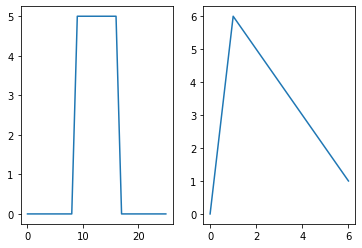

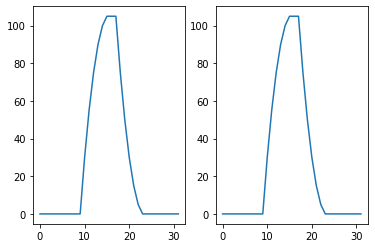

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as draw
from numpy import convolve

def draw_two(one,two):
  d = draw.figure()
  d.add_subplot(1,2,1)
  draw.plot(one)
  d.add_subplot(1,2,2)
  draw.plot(two)

def Convolution(sig,filter):
  # full convolution
  filter = np.flipud(filter)
  m = filter.size
  l = list()
  for i in range(0,((m+1)//2)-1,1):
    l.append(0)

  for i in sig:
    l.append(i)

  for i in range(0,(m)//2,1):
    l.append(0)

  sig = np.array(l)
  n = sig.size
  final = [None]*n
  for i in range(0,n,1):
    ans = 0
    k = i
    for j in range(m//2,-1,-1):    # ans += sig[i+j]*filter[m-j-1] it's not convolved with mid point
      if k>=0 and k<n :            # for circular remove this condition
        ans += filter[j]*sig[k]  
        k -= 1

    k = i+1
    for j in range((m//2) + 1,m,1):
      if k<n:
        ans += filter[j]*sig[k]  # for circular write  k%n
        k += 1
    
    final[i] = ans
  return np.array(final)

sig = np.array([0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,0,0,0,0,0,0,0,0,0])
filter = np.array([0,6,5,4,3,2,1])

# sig = np.random.rand(1,100)
# sig = sig[0]*100
# filter = np.random.rand(1,20)
# filter = filter[0]*100

draw_two(sig,filter)
draw_two(Convolution(sig,filter),convolve(sig,filter))

#complexity is O(N*M) we need better algorithm

# Example of multplication :
# print(Convolution(np.array([1,2,3]),np.array([4,5,6])))


### Multiplication as Convolution :
![](https://i.ibb.co/zmzxTxC/multi.png)


![](https://i.ibb.co/kQK8CPP/def.png)

343 441 3


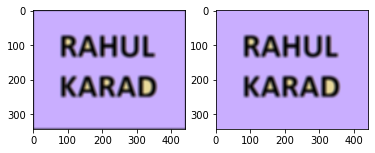

In [54]:
# Convolution on images (2D convolution) :
from scipy import signal
main = cv.imread('/content/drive/MyDrive/Digital_image_processing/written.png')
filter = np.ones((11,11),dtype=np.float64)/121

def Convolution_2D(main,filter):
  n , m , k = main.shape
  f_n , f_m = filter.shape
  print(n,m,k)
  final = np.zeros((n,m,k),dtype=np.uint8)

  if f_n != f_m or f_n%2 == 0:
    return "Kernel should be of odd size"

  dx = []
  dy = []
  init = []
  for i in range(-(f_n//2),(f_n//2)+1,1):
    init.append(i)
  x = 0;
  y = 0
  for i in range(1,f_n*f_n+1,1):
    dx.append(init[x])
    dy.append(init[y])
    y += 1
    if i%f_n == 0:
      x += 1
      y = 0
  
  valid = lambda x,y : x>=0 and y>=0 and x<n and y<m

  for i in range(0,n,1):
    for j in range(0,m,1):
      for p in range(0,k,1):
        temp = 0
        start = 0
        end = 0
        for l in range(0,len(dx),1):
          x = i + dx[l]
          y = j + dy[l]
          if valid(x,y):
            temp += main[x][y][p] * filter[dx[l]+(f_n//2)][dy[l]+(f_n//2)]
        
        temp = int(temp)
        final[i][j][p] = temp

  return final

        
out = Convolution_2D(main,filter) # this one will take almost 4 minutes

# for comparison
red = signal.convolve2d(main[:,:,0],filter,boundary='symm', mode='same')
green = signal.convolve2d(main[:,:,1],filter,boundary='symm', mode='same')
blue = signal.convolve2d(main[:,:,2],filter,boundary='symm', mode='same')

original = np.zeros(main.shape,dtype=np.uint8)
original[:,:,0] = red
original[:,:,1] = green
original[:,:,2] = blue

# print

fig = draw.figure()
fig.add_subplot(1,2,1)
draw.imshow(out)
fig.add_subplot(1,2,2)
draw.imshow(original)
